In [ ]:
# Exploratory Data Analysis for Employer Project

In [ ]:
# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm

pd.set_option("display.max_columns", None)


# sns.set(rc = {'figure.figsize':(15,10)})



In [ ]:
# Load the data

In [ ]:
# All features data set

In [2]:
df = pd.read_csv('df_final.csv')

In [ ]:
# Secured Parking Analysis Data set 

In [60]:
parking = pd.read_csv('parking_1208.csv')

In [ ]:
# Theft Analysis Data set 

In [2]:
theft = pd.read_csv('theft_working.csv')

In [ ]:
# Dedicated Cycling Analysis Data set 

In [88]:
cycle_lanes_week =pd.read_csv('cycle_lanes_week copy.csv')

In [92]:
cycle_lanes_track =pd.read_csv('cycle_lanes_track.csv')

In [108]:
cycle_track_new =pd.read_csv('cycle_track_new.csv')

In [ ]:
# Understanding the features data set

In [45]:
df.head(5)

,Name,No working Individuals,Mean income£,Median income £,Total enterprises,0-9 emp/Micro,10-49 emp/Small,50-249 emp/Medium,250-999 emp/Large,1000+emp/Large,Total borough population,Population sqm,Total Secure parking,Sec.Prk/pop_sqm,Total Bike Tefth,Tefth per capita,Total length of Segregated Cycle Lane (on),Total length of Segregated Cycle Lane (off),Total by length of Segregated Cycle Lane (on+off),Total road length,Total Cycle track as % of Road length,Cycle 5+ times a week (Proportion of adults that cycle),Preffered mode of transport: Cycle,All ages_x,all '0-11,all'12-34,all'35-49,all'50-64,all'65-74,all'75-,all'0-11,all'12-34.1,all'35-49.1,all'50-64.1,all'65-74.1,all'75-.1,all'0-11.1,all'12-64,all'65-,All ages_y,men0-11,men'12-34,men'35-49,men'50-64,men'65-74,men'75-,men'0-11,men'12-34.1,men'35-49.1,men'50-64.1,men'65-74.1,men'75-.1,men'0-11.1,men'12-64,men'65-,12-64 - men,Men_usage,All ages,women'0-11,women'12-34,women'35-49,women'50-64,women'65-74,women'75-,women'0-11.1,women'12-34.1,women'35-49.1,women'50-64.1,women'65-74.1,women75-,women'0-11.2,women'12-64,women'65-,12-64 - women,Women_usage,"Sum of Unshared dwelling; Flat; maisonette or apartment; \nPurpose built block of flats or tenement, including bed sits, In commercial building, Caravan or other mobile or temporary structure + shared","Sum of Unshared dwelling;\nWhole house or bungalow - detached, semi detached, terraced incl end of terrace",Sum of All categories; Accommodation type,"Percentage of flats, maisonette or apartment (shared or unshared)","Percentage of whole house or bungalow - detached, semi detached, terraced incl end of terrace",White,"Other (Black, Asian, Mixed/other)",Total,White %,Other %
0,Barking and Dagenham,85000,29400,25700,6920,6440,400,75,5,5,214858,5950.5,232,0.039,34791,6.0,1.77,23.83,25.60,340.33,7.52%,1.52%,1%,212906,45393,70155,46590,30988,10756,9024,21.30%,33.00%,21.90%,14.60%,5.10%,4.20%,21.30%,69.40%,9.30%,105877,23373,36113,22593,15168,5087,3543,22.10%,34.10%,21.30%,14.30%,4.80%,3.30%,22.10%,69.80%,8.20%,-6.11%,high,107029,22020,34042,23997,15820,5669,5481,20.60%,31.80%,22.40%,14.80%,5.30%,5.10%,20.60%,69.00%,10.40%,-3.80%,high,20945,48714,69659,30.07%,69.93%,"108,000","110,000","218,000",50%,50%
1,Barnet,192000,51600,30700,24085,22650,1190,215,20,10,402363,4638.3,247,0.053,87477,19.0,0.36,6.72,7.08,762.82,0.93%,0.90%,1%,395869,64743,118072,88743,67007,30108,27196,16.40%,29.80%,22.40%,16.90%,7.60%,6.90%,16.40%,69.20%,14.50%,196542,33256,60556,44634,32540,14086,11470,16.90%,30.80%,22.70%,16.60%,7.20%,5.80%,16.90%,70.10%,13.00%,-5.81%,average,199327,31487,57516,44109,34467,16022,15726,15.80%,28.90%,22.10%,17.30%,8.00%,7.90%,15.80%,68.30%,15.90%,-4.50%,low,57944,77803,135747,42.69%,57.31%,"257,000","140,000","397,000",65%,35%
2,Bexley,126000,36000,28000,8820,8120,555,120,10,5,252885,4174.4,5,0.001,31977,8.0,4.38,15.01,19.39,560.05,3.46%,1.64%,1%,248287,39116,71204,50462,46537,20603,20365,15.80%,28.70%,20.30%,18.70%,8.30%,8.20%,15.80%,67.70%,16.50%,120082,20110,35242,24335,22615,9727,8053,16.70%,29.30%,20.30%,18.80%,8.10%,6.70%,16.70%,68.40%,14.80%,-7.44%,high,128205,19006,35962,26127,23922,10876,12312,14.80%,28.10%,20.40%,18.70%,8.50%,9.60%,14.80%,67.10%,18.10%,-5.70%,sign high,21382,71202,92584,23.09%,76.91%,"207,000","44,000","251,000",82%,18%
3,Brent,155000,37800,26200,15530,14385,925,175,35,10,340710,7880.9,210,0.027,99124,13.0,10.83,13.02,23.85,487.37,4.89%,0.96%,2%,329771,54948,106231,71235,56269,22442,18646,16.70%,32.20%,21.60%,17.10%,6.80%,5.70%,16.70%,70.90%,12.50%,168277,28113,56595,36949,27746,10844,8030,16.70%,33.60%,22.00%,16.50%,6.40%,4.80%,16.70%,72.10%,11.20%,-3.81%,high,161494,26835,49636,34286,28523,11598,10616,16.60%,30.70%,21.20%,17.70%,7.20%,6.60%,16.60%,69.60%,13.80%,-3.20%,high,57698,52534,110232,52.34%,47.66%,"124,000","207,000","331,000",37%,63%
4,Bromley,176000,48200,33700,15475,14435,830,160,40,10,334292,2226.6,257,0.115,62207,28.0,0.65,13.97,14.63,906.18,1.61%,1.90%,1%,332336,51805,84679,74215,63460,300

In [4]:
df.shape

(33, 85)

In [ ]:
# As seen above the features dataset has 85 columns representing added features for our analysis
# These features will be further used to establish correlations and trends

In [ ]:
# Check for null values

In [17]:
df.isnull().sum()

Name                                 0
No working Individuals               0
Mean income£                         0
Median income £                      0
Total enterprises                    0
                                    ..
White                                0
Other (Black, Asian, Mixed/other)    1
Total                                0
White %                              0
Other %                              0
Length: 85, dtype: int64

In [3]:
df['Total Secure parking'].isnull().sum()

1

In [ ]:
# As seen above there is 1 null value

In [ ]:
# Replace null value with the mean of the Total Secure parking column

In [4]:
df['Total Secure parking'].fillna(df['Total Secure parking'].mean(),inplace=True)

In [ ]:
# Checking for replaced null values

In [5]:
df['Total Secure parking'].isnull().sum()

0

In [ ]:
# checking data types

In [6]:
df.dtypes

Name                                 object
No working Individuals                int64
Mean income£                          int64
Median income £                       int64
Total enterprises                     int64
                                      ...  
White                                object
Other (Black, Asian, Mixed/other)    object
Total                                object
White %                              object
Other %                              object
Length: 85, dtype: object

In [ ]:
# As seen above a few datatyoes need to be converted

In [7]:
df.dtypes["Total Secure parking"]

dtype('float64')

In [ ]:
# Converting Object data type to interger data type

In [8]:
df['Total Secure parking'] = df['Total Secure parking'].astype(int)

In [9]:
df.dtypes["Total Secure parking"]

dtype('int64')

In [10]:
df.dtypes["Total Bike Tefth"]

dtype('float64')

In [ ]:
# Check for null values

In [11]:
df['Total Bike Tefth'].isnull().sum()

1

In [ ]:
# Replace null value with the mean of the Total Bike Tefth column

In [12]:
df['Total Bike Tefth'].fillna(df['Total Bike Tefth'].mean(),inplace=True)

In [13]:
df['Total Bike Tefth'].isnull().sum()

0

In [ ]:
# Converting Object data type to interger data type

In [14]:
df['Total Bike Tefth'] = df['Total Bike Tefth'].astype(int)

In [15]:
df.dtypes["Total Bike Tefth"]

dtype('int64')

In [ ]:
# Checking data types

In [16]:
df.dtypes["Sum of Unshared dwelling; Flat; maisonette or apartment; \nPurpose built block of flats or tenement,  including bed sits, In commercial building, Caravan or other mobile or temporary structure + shared"]

dtype('int64')

In [17]:
df['Sum of Unshared dwelling; Flat; maisonette or apartment; \nPurpose built block of flats or tenement,  including bed sits, In commercial building, Caravan or other mobile or temporary structure + shared'] = df['Sum of Unshared dwelling; Flat; maisonette or apartment; \nPurpose built block of flats or tenement,  including bed sits, In commercial building, Caravan or other mobile or temporary structure + shared'].astype(int)

In [18]:
df.dtypes["Sum of Unshared dwelling; Flat; maisonette or apartment; \nPurpose built block of flats or tenement,  including bed sits, In commercial building, Caravan or other mobile or temporary structure + shared"]

dtype('int64')

In [19]:
df.dtypes["Sum of Unshared dwelling;\nWhole house or bungalow - detached, semi detached, terraced incl end of terrace"]

dtype('int64')

In [20]:
df.dtypes['Sum of All categories; Accommodation type']

dtype('int64')

In [ ]:
# Checking all column names

In [21]:
df.columns 

Index(['Name', 'No working Individuals', 'Mean income£', 'Median income £',
       'Total enterprises', ' 0-9 emp/Micro', '10-49 emp/Small ',
       '50-249 emp/Medium ', '250-999 emp/Large ', '1000+emp/Large ',
       'Total borough population', 'Population sqm', 'Total Secure parking',
       'Sec.Prk/pop_sqm', 'Total Bike Tefth', 'Tefth per capita',
       'Total length of Segregated Cycle Lane (on)',
       'Total length of Segregated Cycle Lane (off)',
       'Total by length of Segregated Cycle Lane (on+off)',
       'Total road length ', 'Total Cycle track as % of Road length',
       'Cycle 5+ times a week (Proportion of adults that cycle)',
       'Preffered mode of transport: Cycle', 'All ages_x', 'all '0-11',
       'all'12-34', 'all'35-49', 'all'50-64', 'all'65-74', 'all'75-',
       'all'0-11', 'all'12-34.1', 'all'35-49.1', 'all'50-64.1', 'all'65-74.1',
       'all'75-.1', 'all'0-11.1', 'all'12-64', 'all'65-', 'All ages_y',
       'men0-11', 'men'12-34', 'men'35-49', 'men'

In [ ]:
# Determining correlation between multiple variables

In [22]:
df.corr()

,No working Individuals,Mean income£,Median income £,Total enterprises,0-9 emp/Micro,10-49 emp/Small,50-249 emp/Medium,250-999 emp/Large,1000+emp/Large,Total borough population,Population sqm,Total Secure parking,Sec.Prk/pop_sqm,Total Bike Tefth,Tefth per capita,Total length of Segregated Cycle Lane (on),Total length of Segregated Cycle Lane (off),Total by length of Segregated Cycle Lane (on+off),Total road length,All ages_x,all '0-11,all'12-34,all'35-49,all'50-64,all'65-74,all'75-,All ages_y,men0-11,men'12-34,men'35-49,men'50-64,men'65-74,men'75-,All ages,women'0-11,women'12-34,women'35-49,women'50-64,women'65-74,women'75-,"Sum of Unshared dwelling; Flat; maisonette or apartment; \nPurpose built block of flats or tenement, including bed sits, In commercial building, Caravan or other mobile or temporary structure + shared","Sum of Unshared dwelling;\nWhole house or bungalow - detached, semi detached, terraced incl end of terrace",Sum of All categories; Accommodation type
No working Individuals,1.000000,-0.592774,-0.614017,-0.112575,-0.063777,-0.324047,-0.385071,-0.395117,-0.440405,0.956378,-0.554681,0.072327,0.194905,-0.246585,-0.290262,-0.043245,0.227731,0.137093,0.748493,0.949569,0.898043,0.779341,0.924646,0.914368,0.772048,0.698137,0.931631,0.897970,0.770035,0.878815,0.919520,0.767128,0.701166,0.959394,0.897784,0.775650,0.945446,0.905587,0.774121,0.691732,0.308945,0.669514,0.918590
Mean income£,-0.592774,1.000000,0.835263,0.488003,0.462385,0.573222,0.585880,0.573419,0.552132,-0.570858,0.434703,-0.071580,-0.194515,0.493409,0.458072,0.151348,-0.453541,-0.235111,-0.539706,-0.555183,-0.677215,-0.424303,-0.516859,-0.525451,-0.389248,-0.372192,-0.546656,-0.675490,-0.434944,-0.467133,-0.533656,-0.407716,-0.341518,-0.558943,-0.678778,-0.406125,-0.554608,-0.515512,-0.371276,-0.391451,0.230512,-0.650980,-0.382688
Median income £,-0.614017,0.835263,1.000000,0.483786,0.453601,0.579589,0.636892,0.629266,0.674441,-0.653939,0.282840,0.057909,0.009717,0.507174,0.683891,0.118527,-0.528408,-0.307531,-0.542360,-0.631651,-0.755395,-0.457006,-0.595671,-0.624985,-0.495374,-0.452563,-0.637828,-0.754734,-0.498415,-0.557818,-0.630746,-0.505643,-0.446770,-0.619863,-0.755809,-0.406600,-0.618095,-0.616892,-0.484516,-0.453859,0.132126,-0.653885,-0.479984
Total enterprises,-0.112575,0.488003,0.483786,1.000000,0.997607,0.949666,0.909899,0.883530,0.798961,-0.004015,0.004564,0.097558,-0.062314,0.674557,0.505072,0.516888,-0.342434,0.056759,-0.191984,0.028248,-0.135373,0.136054,0.040670,-0.048027,0.000738,-0.029900,0.053807,-0.135247,0.144274,0.105104,-0.032609,0.001529,0.015974,0.002137,-0.135455,0.125276,-0.030419,-0.062205,0.000018,-0.061931,0.502446,-0.434548,0.079702
0-9 emp/Micro,-0.063777,0.462385,0.453601,0.997607,1.000000,0.925929,0.880401,0.851602,0.765691,0.043618,-0.004278,0.099746,-0.058466,0.660977,0.491585,0.503089,-0.339754,0.050642,-0.156726,0.076103,-0.088506,0.171757,0.089177,-0.002939,0.045570,0.010427,0.100552,-0.088618,0.179811,0.150558,0.012261,0.045851,0.057625,0.050696,-0.088354,0.160542,0.019882,-0.017109,0.045173,-0.022779,0.515192,-0.400527,0.123541
10-49 emp/Small,-0.324047,0.573222,0.579589,0.949666,0.925929,1.000000,0.981576,0.967339,0.884658,-0.212714,0.057758,0.089552,-0.078211,0.699627,0.537008,0.552552,-0.340558,0.078839,-0.342492,-0.184058,-0.335101,-0.028443,-0.173083,-0.243491,-0.199799,-0.209339,-0.155138,-0.333958,-0.020397,-0.098007,-0.228797,-0.197376,-0.172024,-0.211709,-0.336180,-0.036241,-0.249033,-0.256143,-0.201380,-0.234260,0.425896,-0.562633,-0.112808
50-249 emp/Medium,-0.385071,0.585880,0.636892,0.909899,0.880401,0.981576,1.000000,0.987889,0.948896,-0.293357,0.021666,0.052785,-0.082459,0.664862,0.558419,0.522021,-0.308056,0.084231,-0.364619,-0.264442,-0.399004,-0.098961,-0.264555,-0.313633,-0.258894,-0.257055,-0.235602,-0.397452,-0.089863,-0.192741,-0.297148,-0.253882,-0.224031,-0.291307,-0.400490,-0.106641,-0.334115,-0.327653,-0.262642,-0.278670,0.343359,-0.579663,-0.207977
250-999 emp/Large,-0.395117,0.5734

In [ ]:
# From the above we have selected variables which show strong correlation among each other. 
#These variables will be shown further down

In [3]:
df.columns

Index(['Name', 'No working Individuals', 'Mean income£', 'Median income £',
       'Total enterprises', ' 0-9 emp/Micro', '10-49 emp/Small ',
       '50-249 emp/Medium ', '250-999 emp/Large ', '1000+emp/Large ',
       'Total borough population', 'Population sqm', 'Total Secure parking',
       'Sec.Prk/pop_sqm', 'Total Bike Tefth', 'Tefth per capita',
       'Total length of Segregated Cycle Lane (on)',
       'Total length of Segregated Cycle Lane (off)',
       'Total by length of Segregated Cycle Lane (on+off)',
       'Total road length ', 'Total Cycle track as % of Road length',
       'Cycle 5+ times a week (Proportion of adults that cycle)',
       'Preffered mode of transport: Cycle', 'All ages_x', 'all '0-11',
       'all'12-34', 'all'35-49', 'all'50-64', 'all'65-74', 'all'75-',
       'all'0-11', 'all'12-34.1', 'all'35-49.1', 'all'50-64.1', 'all'65-74.1',
       'all'75-.1', 'all'0-11.1', 'all'12-64', 'all'65-', 'All ages_y',
       'men0-11', 'men'12-34', 'men'35-49', 'men'

In [ ]:
# Showing a correaltion between variables

In [ ]:
# Understanding theft dataset

In [3]:
theft.head(2)

,Location,Number of Secure Parking,Property Value for Bicycle Theft Offences (2019 data in Pound)
0,Barking & Dagenham,232.0,34791.0
1,Barnet,247.0,87477.0


In [ ]:
# Renaming column name

In [4]:
theft.rename(columns = {'Location':'Borough'}, inplace = True)

In [5]:
theft.head(2)

,Borough,Number of Secure Parking,Property Value for Bicycle Theft Offences (2019 data in Pound)
0,Barking & Dagenham,232.0,34791.0
1,Barnet,247.0,87477.0


In [ ]:
# Dropping NA rows

In [7]:
theft_final=theft.dropna()

In [8]:
# Checking datatype

In [9]:
theft_final.dtypes

Borough                                                            object
Number of Secure Parking                                          float64
Property Value for Bicycle Theft Offences (2019 data in Pound)    float64
dtype: object

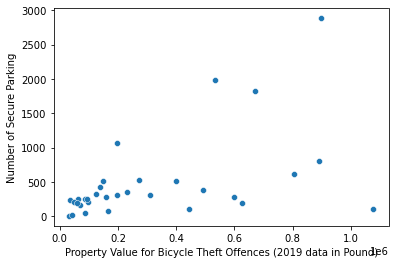

In [10]:
sns.scatterplot(x="Property Value for Bicycle Theft Offences (2019 data in Pound)", y="Number of Secure Parking", data=theft_final)
plt.show()

In [ ]:
# Determing a correlation

In [12]:
x=theft_final['Property Value for Bicycle Theft Offences (2019 data in Pound)']
y=theft_final['Number of Secure Parking']

In [13]:
cor = np.corrcoef(x, y)

In [14]:
cor

array([[1.        , 0.50180245],
       [0.50180245, 1.        ]])

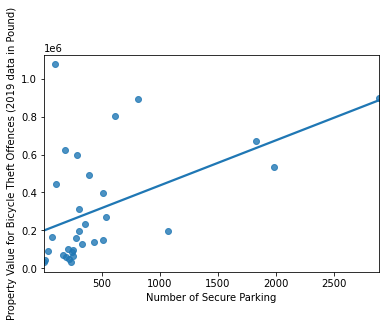

In [15]:
sns.regplot(x="Number of Secure Parking", y="Property Value for Bicycle Theft Offences (2019 data in Pound)", data=theft_final,ci=None)
plt.show()

In [ ]:
# As seen above there the correlation above is not strong enough to suggest further invetigation

In [ ]:
# Proceed to establish a correlation between other variables 

In [ ]:
# Understanding the parking data set

In [83]:
parking.head(5)

,Borough,Flat _perct,Bicycle Theft Values / Pop per sq km,Enterprises > 10,Median income,Total_Bike_Theft_Value
0,Barking and Dagenham,0.30,5950.5,485,25700,34791
1,Barnet,0.43,4638.3,1435,30700,87477
2,Bexley,0.23,4174.4,690,28000,31977
3,Brent,0.52,7880.9,1145,26200,99124
4,Bromley,0.29,2226.6,1040,33700,62207


In [ ]:
# Checking data types

In [62]:
parking.dtypes

Borough                                  object
Flat _perct                             float64
Bicycle Theft Values / Pop per sq km    float64
Enterprises > 10                          int64
Median income                             int64
Total Bike Theft                          int64
dtype: object

In [ ]:
# Determing a correaltion between Bicycle Theft Values / Pop per sq km & Flat _perct

In [63]:
x=parking['Bicycle Theft Values / Pop per sq km']
y=parking['Flat _perct']

In [66]:
corr = np.corrcoef(x, y)

In [67]:
corr

array([[1.        , 0.93288231],
       [0.93288231, 1.        ]])

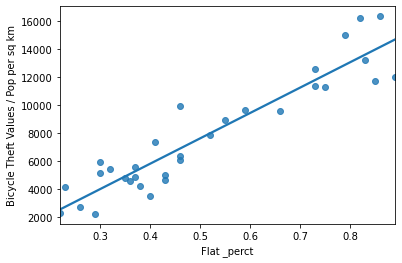

In [69]:
sns.regplot(x="Flat _perct", y="Bicycle Theft Values / Pop per sq km", data=parking,ci=None)
plt.show()

In [ ]:
# Renaming a column

In [70]:
parking.rename(columns = {'Total Bike Theft':'Total_Bike_Theft_Value'}, inplace = True)

In [ ]:
# Showing only column names

In [71]:
parking.columns

Index(['Borough', 'Flat _perct', 'Bicycle Theft Values / Pop per sq km',
       'Enterprises > 10', 'Median income ', 'Total_Bike_Theft_Value'],
      dtype='object')

In [ ]:
# Determing a correaltion between Enterprises > 10 & Total_Bike_Theft_Value

In [72]:
x=parking['Enterprises > 10']
y=parking['Total_Bike_Theft_Value']

In [74]:
corr = np.corrcoef(x, y)

In [75]:
corr

array([[1.        , 0.73517797],
       [0.73517797, 1.        ]])

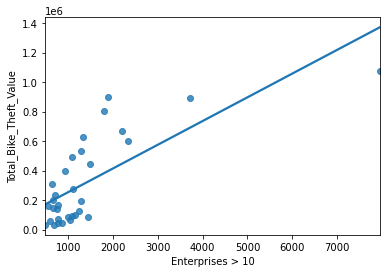

In [76]:
sns.regplot(x="Enterprises > 10", y="Total_Bike_Theft_Value", data=parking,ci=None)
plt.show()

In [ ]:
#Determing a correaltion between Median income  & Total_Bike_Theft_Value

In [79]:
x=parking['Median income ']
y=parking['Total_Bike_Theft_Value']

In [80]:
corr = np.corrcoef(x, y)

In [81]:
corr

array([[1.        , 0.68199076],
       [0.68199076, 1.        ]])

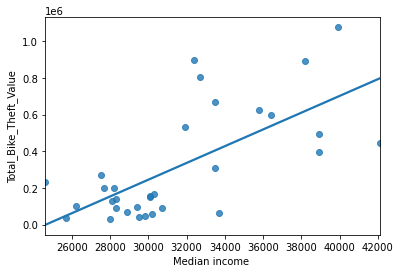

In [82]:
sns.regplot(x="Median income ", y="Total_Bike_Theft_Value", data=parking,ci=None)
plt.show()

In [89]:
cycle_lanes_week.head(2)

,Borough,Cycle 5+ times a week,Bourough_group
0,Waltham Forest,6.2266,Outer
1,Newham,3.2736,Outer


In [97]:
cycle_lanes_track.head(10)

,Borough,Total Cycle track as % of Road length,Cycle 5+ times a week,Borough_group
0,Waltham Forest,0.090695,6.2266,Outer
1,Hounslow,0.086719,3.2736,Outer
2,Newham,0.081628,3.0919,Outer
3,Barking & Dagenham,0.075235,3.0288,Outer
4,Hillingdon,0.062323,2.6050,Outer
5,Sutton,0.055713,2.1509,Outer
6,Brent,0.048941,1.8969,Outer
7,Ealing,0.042792,1.7475,Outer
8,Bexley,0.034619,1.6402,Outer
9,Harrow,0.032981,1.5245,Outer


In [ ]:
# Understandingf the cycle_track_new data set

In [114]:
cycle_track_new.head(5)

,Borough,Cycle 5+ times a week,Total Cycle track as % of Road length
0,Waltham Forest,6.2266,0.090695
1,Newham,3.2736,0.081628
2,Ealing,3.0919,0.042792
3,Hounslow,3.0288,0.086719
4,Hillingdon,2.6050,0.062323


In [ ]:
#Determing a correaltion between Total Cycle track as % of Road length & Cycle 5+ times a week

In [110]:
x=cycle_track_new['Total Cycle track as % of Road length']
y=cycle_track_new['Cycle 5+ times a week']

In [111]:
corr = np.corrcoef(x, y)

In [112]:
corr

array([[1.        , 0.69725462],
       [0.69725462, 1.        ]])

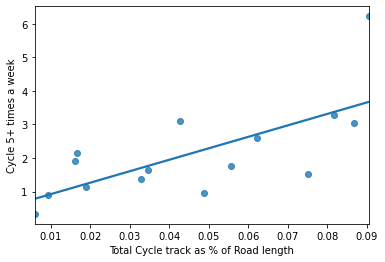

In [113]:
sns.regplot(x="Total Cycle track as % of Road length", y="Cycle 5+ times a week", data=cycle_track_new,ci=None)
plt.show()